This is a simple example on how you can use a jupyter notebook to train your model :) 

In [64]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots

In [65]:
class ModelBest(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()

        P = 1
        K = 3
        S = 1
        
        self.num_classes = num_classes
        self.feature_extractor = nn.Sequential( 
            #clayer1
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = K, stride = S, padding = P),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Dropout(p = 0.2),
            #clayer2
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride = S, padding = 2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(p=0.2),
            #clayer3
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = K, stride = S, padding = P),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(p = 0.2),
            #clayer4
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = K, stride = S, padding = P),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(p = 0.2),
        )

        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        self.num_output_features = 128*4 #32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        
        self.classifier = nn.Sequential(
            nn.Linear(self.num_output_features, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            #nn.Dropout(p = 0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            #nn.Dropout(p = 0.2),
            nn.Linear(32, 10),
        )

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        # TODO: Implement this function (Task  2a)
        batch_size = x.shape[0]
        out = x
        expected_shape = (batch_size, self.num_classes)
        
        clayer = self.feature_extractor(out)
        clayer = clayer.view(batch_size, -1)
        out = self.classifier(clayer)   
        
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [66]:
epochs = 10
batch_size = 64
learning_rate = 10e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ModelBest(image_channels = 4, num_classes = 10)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
ModelBest(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Dropout(p=0.2, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.2, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, pad

In [67]:
#Calculate train, test and validation accuracy
model.eval()
test = trainer.dataloader_test
train = trainer.dataloader_train
val = trainer.dataloader_val
print(compute_loss_and_accuracy(val, model = model, loss_criterion = nn.CrossEntropyLoss()))
print(compute_loss_and_accuracy(test, model = model, loss_criterion = nn.CrossEntropyLoss()))
print(compute_loss_and_accuracy(train, model = model, loss_criterion = nn.CrossEntropyLoss()))

(tensor(0.7319, device='cuda:0'), 0.7656)
(tensor(0.7347, device='cuda:0'), 0.7618)
(tensor(0.4234, device='cuda:0'), 0.8537517780938834)


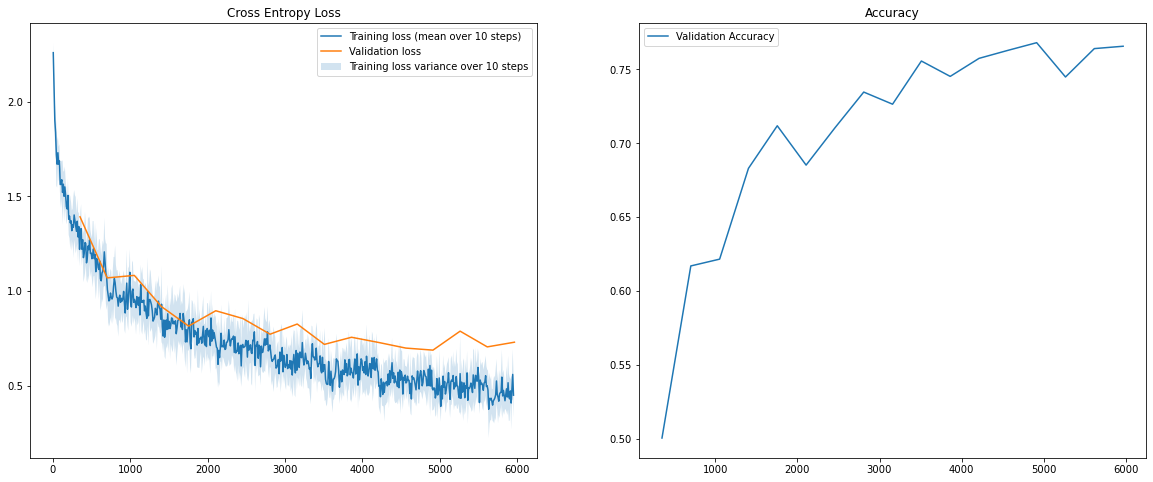

In [68]:
create_plots(trainer, "overwrite")